# Pumpkin Seeds Classification Project

<p>Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. A study was carried out on the two most important and quality types of pumpkin seeds, <b>‘‘Urgup_Sivrisi’’</b> and <b>‘‘Cercevelik’’</b>, generally grown in Urgup and Karacaoren regions in Turkey. However, morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. Considering morphological features, all the data were modeled with five different machine learning methods: Logistic Regression (LR), Multilayer Perceptrons (MLP), Support Vector Machine (SVM) and Random Forest (RF), and K-Nearest Neighbor (KNN), which further determined the most successful method for classifying pumpkin seed varieties. However, the performances of the models were determined with the help of the 10 kfold cross-validation method. The accuracy of the classifiers were obtained as LR 87.92%, MLP 88.52%, SVM 88.64%, RF 87.56%, and KNN 87.64%.</p>                                     
<p>Briefly, we'll let the machine learn the features to classify the pumpkin seeds into 2 categories: "Urgup_Sivrisi" and "Cercevelik". As it is a binary classification, we can use logistic regression. <b>Here, we use logistic regression to train the model.</b></p>

#### Dataset
The dataset comes from https://www.muratkoklu.com/datasets/

#### Citation Request
KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0</br>
https://link.springer.com/article/10.1007/s10722-021-01226-0</br>
https://link.springer.com/content/pdf/10.1007/s10722-021-01226-0.pdf

## Data preprocessing

In [1]:
# Import Libraries
import copy, math
import pandas as pd
import numpy as np

In [2]:
# Import the dataset
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [3]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [5]:
# Transform non-numerical data into numerical ones for later processing
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l.fit(df.Class.drop_duplicates()) 
# 0: Çerçevelik 1: Ürgüp Sivrisi
df.Class = l.transform(df.Class) 

In [6]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


## Data visualization and analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#correlation checking
df.corr()['Class'].sort_values()

Compactness         -0.726676
Roundness           -0.669514
Minor_Axis_Length   -0.401362
Extent              -0.236076
Solidity             0.122674
Equiv_Diameter       0.160303
Convex_Area          0.168029
Area                 0.170280
Perimeter            0.388345
Major_Axis_Length    0.561458
Eccentricity         0.699319
Aspect_Ration        0.721796
Class                1.000000
Name: Class, dtype: float64

<Axes: >

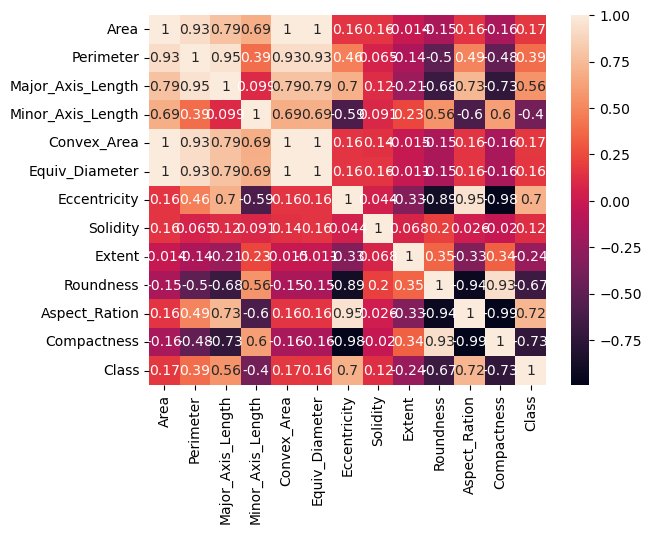

In [9]:
corr = df.corr()
sns.heatmap(corr,cmap="rocket",annot=True)

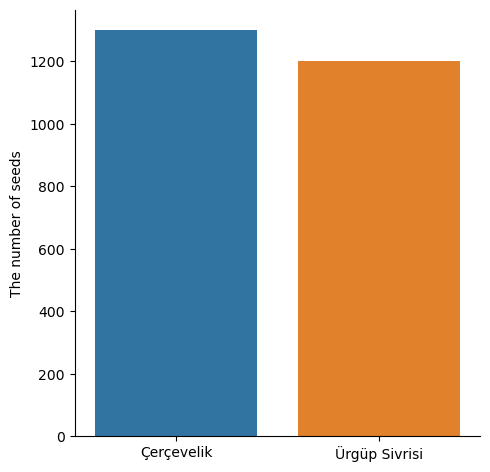

In [10]:
# The number of each category
g = sns.catplot(data=df,x='Class',kind='count')
g.set_axis_labels("", "The number of seeds")
g.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

[Text(0, 0, 'Çerçevelik'), Text(1, 0, 'Ürgüp Sivrisi')]

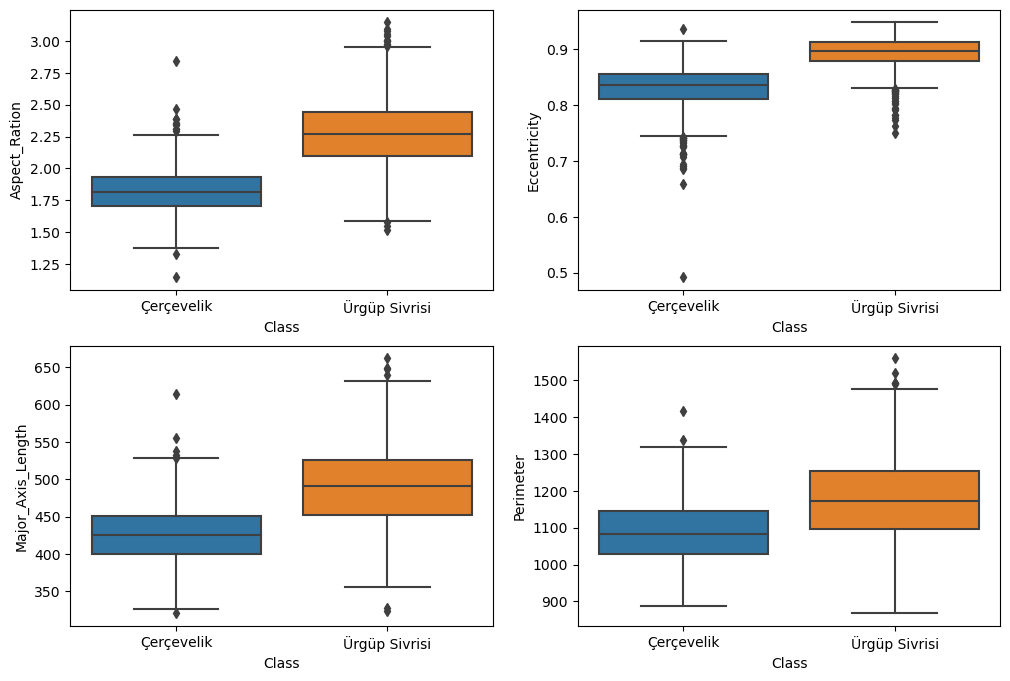

In [11]:
# Boxplot
f = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
# Aspect_Ration vs Class
a=sns.boxplot(data=df,x='Class',y='Aspect_Ration')
a.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,2)
# Eccentricity vs Class
b=sns.boxplot(data=df,x='Class',y='Eccentricity')
b.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,3)
# Major_Axis_Length vs Class
c=sns.boxplot(data=df,x='Class',y='Major_Axis_Length')
c.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

plt.subplot(2,2,4)
# Perimeter vs Class
d=sns.boxplot(data=df,x='Class',y='Perimeter')
d.set_xticklabels(["Çerçevelik", "Ürgüp Sivrisi"])

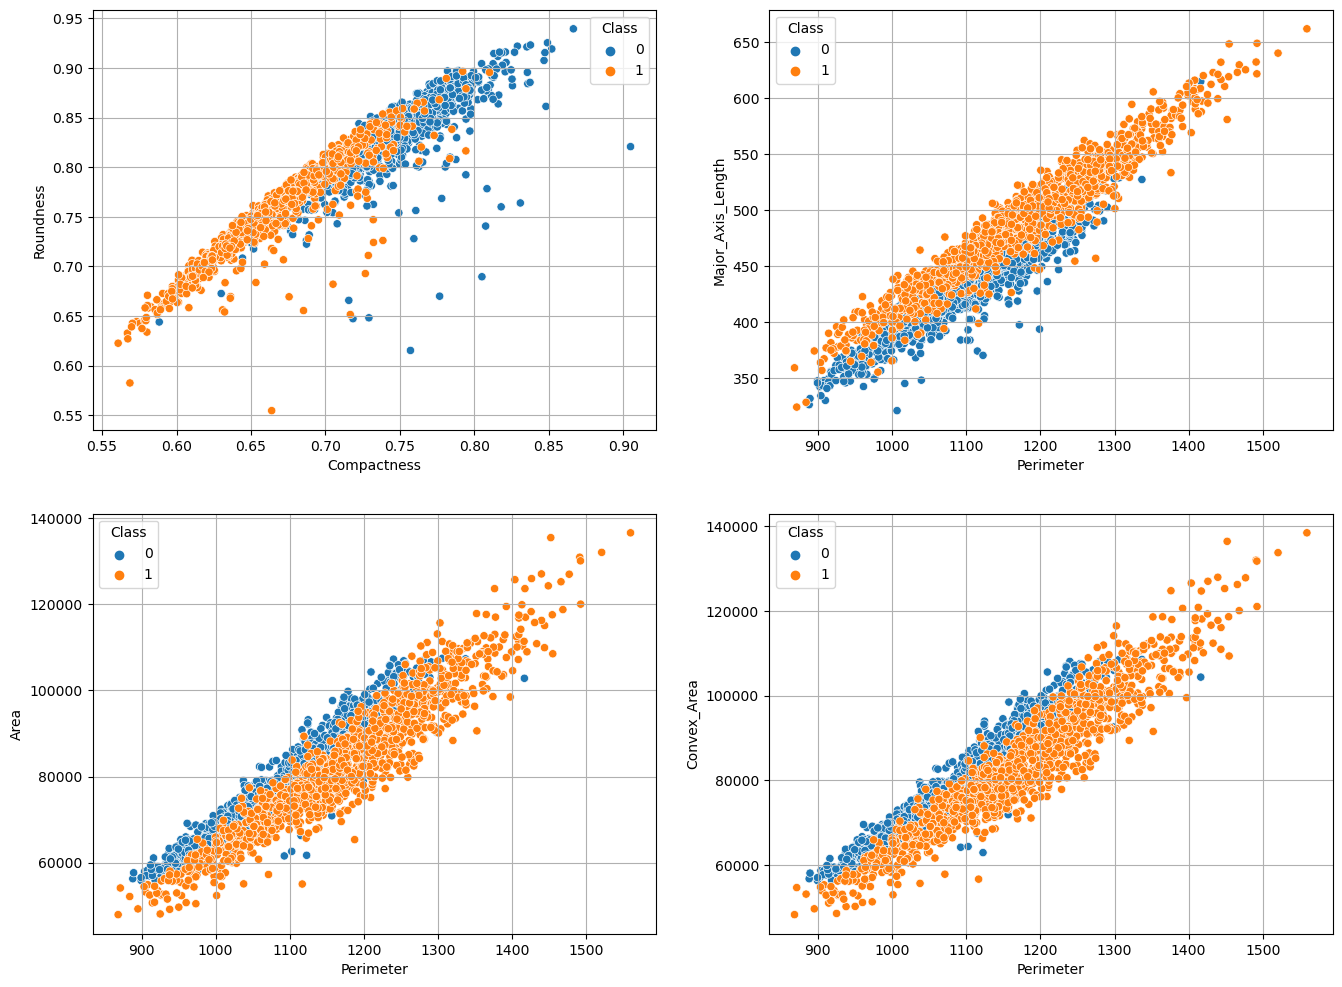

In [12]:
#The relationships among other features
f = plt.figure(figsize=(16,12))
#Roundness vs. Compactness
plt.subplot(2,2,1)
sns.scatterplot(data=df,x='Compactness', y='Roundness',hue='Class')
plt.grid()

#Perimeter vs. Major_Axis_Length
plt.subplot(2,2,2)
sns.scatterplot(data=df,x='Perimeter', y='Major_Axis_Length',hue='Class')
plt.grid()

#Perimeter vs. Area
plt.subplot(2,2,3)
sns.scatterplot(data=df,x='Perimeter', y='Area',hue='Class')
plt.grid()

#Perimeter vs. Convex_Area
plt.subplot(2,2,4)
sns.scatterplot(data=df,x='Perimeter', y='Convex_Area',hue='Class')
plt.grid()

## Logistic Regression Implementation

In [13]:
# Split the dataset and label the target
X = df.drop(columns='Class').values
y = df['Class']

### Feature scaling
Feature scaling is an essential machine learning technique for normalizing the range of independent features of data, which is mainly required for gradient-based algorithms(linear regression/logistic regression/neural networks and distanced based algorithms(SVM, KNN, K-Means). In logistic regression, feature scaling can help with improving the accuracy of the model and avoid the overflow problems in exponential operation in sigmoid part and invalid input problem of logarithm operation in loss function.

There are two common ways to rescale the features. I tried both MinMaxScaler and StandardScaler and found that the StandardScaler got higher accuracy, so I use StandardScaler, which improve the model accuracy from 0.89 to 0.902

In [14]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=df.columns[:-1])
X_norm.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


### Train and test set split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size = 0.2, random_state=15)

### 1. Use Sklearn to implement logistic regression

In [16]:
# Train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
# Test the model
y_pred1 = lr.predict(X_test)

In [18]:
lr.coef_ #w

array([[ 2.14224039, -1.54206988,  0.07669222, -0.69711772,  1.94100386,
        -2.10891217, -1.73027628,  0.56800107,  0.06397365, -1.20050408,
         1.76702951, -1.84818285]])

In [19]:
lr.intercept_ #b

array([0.28103359])

In [20]:
# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
acc1 = accuracy_score(y_pred1,y_test)

In [21]:
cm1 = confusion_matrix(y_test,y_pred1)
cm_display1 = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ['Çerçevelik', 'Ürgüp Sivrisi'])

Accuracy: 0.902
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       268
           1       0.90      0.88      0.89       232

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



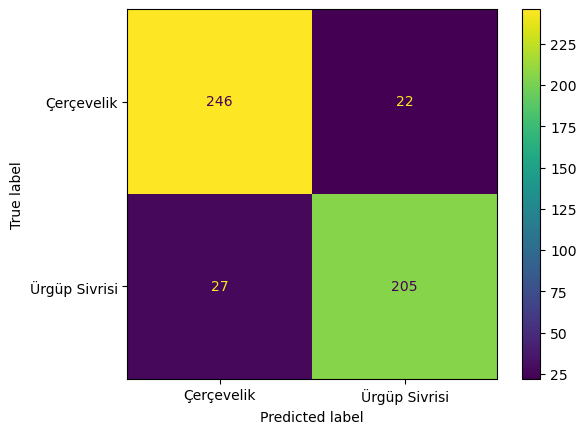

In [22]:
print('Accuracy:',acc1)
print(classification_report(y_test,y_pred1))
cm_display1.plot()
plt.show()

### 2. Construct logistic regression model from scratch

#### 2.1 Sigmoid function
Logistic regression model applies the sigmoid to the linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{1} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$

In [23]:
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

#### 2.2 logistic loss
The cost function for logistic regression is not squared error, instead, we use loss function:
\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

we can simplify it by rewritting loss function as below: 
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [24]:
def loss_function(X, y, w, b):
    
    '''
      X: input features, m examples with n features (m,n)
      y: target values (m,)
      w: coefficients (n,)      
      b: intercept
      
    '''
    m = X.shape[0]
    loss = 0
    for i in range(m):
        z = np.dot(w,X[i])+b
        f_wb_i = sigmoid(z)
        loss += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    loss=loss/m
    
    return loss


#### 2.3 Gradient Descent
Simialr to linear regression, the algorithm for logistic regression also follows the formula below:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Here is what we actually simultaneously update in each iteration:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$


* $z = \mathbf{w} \cdot \mathbf{x} + b$  
* $f_{\mathbf{w},b}(x) = g(z)$  
* $g(z)$ is the sigmoid function:  $g(z) = \frac{1}{1+e^{-z}}$   

In [25]:
def derivative(X, y, w, b):
    
    '''
    Args:
      X: input features, m examples with n features (m,n)
      y: target values (m,)
      w: coefficients (n,)
      b: intercept
    
    Returns
      dj_dw: derivatives of w (n,)
      dj_db: derivative of b

    '''

    m,n = X.shape
    dj_dw=np.zeros(n)
    dj_db=0
    
    for i in range(m):
        z = np.dot(w,X[i])+b
        f_wb_i = sigmoid(z)
        for j in range(n):
            dj_dw[j] += (f_wb_i - y[i]) * X[i][j]
        
        dj_db_i = f_wb_i - y[i]
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db


In [26]:
def gradient_descent(X, y, w0, b0, alpha, it):
    
    '''
    Args:
      X: input features, m examples with n features (m,n)
      y: target values (m,) 
      w0: Initial values of coefficients 
      b0: initial values of intercept
      alpha: learning rate
      it: number of iterations
      
    Returns:
      w: final coefficients
      b: final intercept 
      J_history: cost recording
    
    '''
    J_history = []
    w = copy.deepcopy(w0)
    b = b0
    
    for i in range(it):
        # Update the derivative for each iteration
        dj_dw, dj_db = derivative(X, y, w, b)
        
        # Update w and b each iteration
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Record the value of cost function
        if i<1000000:
            J_history.append(loss_function(X,y,w,b)) 
        
        if i% math.ceil(it / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]} ")
    
    return w, b, J_history


In [27]:
# In case of key error
X_train2 = X_train.to_numpy()
y_train2 = y_train.to_numpy()
X_test2 = X_test.to_numpy()
y_test2 = y_test.to_numpy()

In [33]:
w0 = np.zeros(X_train2.shape[1])
b0 = 0
alpha = 0.6
it = 10000
w,b,J_history = gradient_descent(X_train2, y_train2, w0, b0, alpha, it)
print(w,b)

Iteration    0: Cost 0.43955582325186887 
Iteration 1000: Cost 0.32490810639550943 
Iteration 2000: Cost 0.31911164902137396 
Iteration 3000: Cost 0.3159168280694169 
Iteration 4000: Cost 0.3137150437887925 
Iteration 5000: Cost 0.31204553330250234 
Iteration 6000: Cost 0.31074899689552793 
Iteration 7000: Cost 0.30972639116786 
Iteration 8000: Cost 0.3089084929872359 
Iteration 9000: Cost 0.30824553407579924 
[ 5.16875175 -3.99690443 -0.76566886 -0.46143646  4.61931379 -5.29081004
 -2.4918067   0.6407158   0.06939179 -2.02765343  1.96925458 -3.25807731] 0.3248087864340237


#### 2.4 Model testing

In [34]:
def predict(X, w, b):
    
    m = X.shape[0]
    y_pred2 = np.zeros(m)
    
    for i in range(m):
        z_i = np.dot(w,X[i])+b
        f_wb = sigmoid(z_i)
        
        if f_wb >= 0.5:
            y_pred2[i] = 1
        else:
            y_pred2[i] = 0
    return y_pred2 
    

In [35]:
y_pred2 = predict(X_test2, w, b)

#### 2.5 Model evaluation

In [36]:
acc2 = accuracy_score(y_pred2,y_test2)
cm2 = confusion_matrix(y_test2,y_pred2)
cm_di  splay2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = ['Çerçevelik', 'Ürgüp Sivrisi'])

Accuracy: 0.904
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       268
           1       0.90      0.89      0.90       232

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



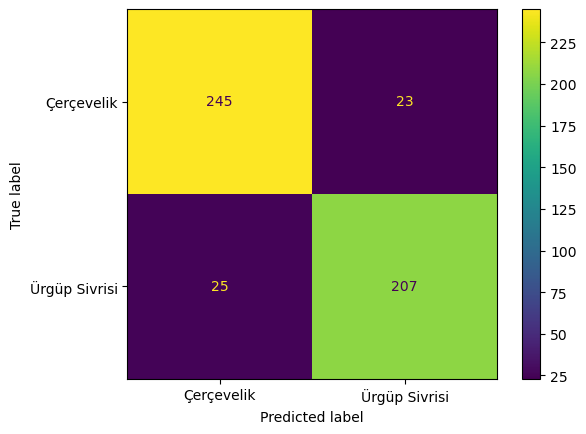

In [37]:
print('Accuracy:',acc2)
print(classification_report(y_test2,y_pred2))
cm_display2.plot()
plt.show()